# **Customer Shopping Data Analysis** 🛍️📊

El objetivo es aplicar los conocimientos adquiridos en bases de datos transaccionales y analíticas, bodega de datos, ETL y análisis descriptivo.  

## **Conjunto de datos**

Este dataset contiene información sobre compras de clientes en una tienda minorista, incluyendo productos, categorías, precios, cantidad comprada y métodos de pago

**link** 🔗: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset/data?select=customer_shopping_data.csv

## **Contenido**

Información de atributos:

**invoice_no**: Número de factura. Nominal. Una combinación de la letra "I" y un entero de 6 dígitos asignado de forma única a cada operación.

**customer_id**: Número de cliente. Nominal. Una combinación de la letra "C" y un entero de 6 dígitos asignado de forma única a cada operación.

**gender**: Variable de cadena que indica el género del cliente.

**age**: Variable de entero positivo que indica la edad del cliente.

**category**: Variable de cadena que indica la categoría del producto adquirido.

**quantity**: Cantidad de cada producto (artículo) por transacción. Numérico.

**price**: Precio unitario. Numérico. Precio del producto por unidad en liras turcas (TL).

**payment_method**: Variable de cadena que indica el método de pago (efectivo, tarjeta de crédito o tarjeta de débito) utilizado para la transacción.

**invoice_date**: Fecha de la factura. El día en que se generó la transacción.

**shopping_mall**: Variable de cadena que indica el nombre del centro comercial en el que se realizó la transacción.

In [5]:
import pandas as pd
df = pd.read_csv('dataset.csv')

**Damos un vistazo al dataset**

In [7]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### **Observaciones**
* La variable **invoice_no** es el id de la transaccion, es un valor unico e irrepetible
* La variable **customer_id** no se repite, es decir que todos los clientes en el dataset son unicos teniendo un total de **99457** clinetes
* La variable **invoice_date** si se repite por lo que hay una fecha donde se realizaron una gran cantidad de compras

⚠️ Es importante realizar una copia del Dataset para al momento de realizar transformaciones en el, tengamos una copia original

In [10]:
df_orig = df
df = df_orig.copy()

In [11]:
# veamos los 10 primeros registros del dataset
df.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [12]:
# mostrar informacion basica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


---
**Podemos observar**:  
* age y quantity son enteros  
* price es flotante, una variable continua
* Las demas variables son de tipo object "string"

In [14]:
# Informacion estadistica del dataset
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## 🔍 **Conclusiones rápidas:**
- La mayoría de las edades están entre **30 y 56 años**, con un promedio de **43.4**.
- La mayoría de las compras son de **2 a 4 unidades**.
- Los precios varían mucho **desviación estándar alta**. La mayoría de las compras cuestan menos de **1200.32**, pero hay algunas muy caras **hasta 5250**, lo que sugiere la presencia de valores atípicos o una distribución sesgada.

### **Observando algunas variables del dataset**

In [17]:
# mostrar que categorias hay
df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [18]:
# mostar los metodos de pago
df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [19]:
# mostrar los tipos de centros comerciales
df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

### **Graficando algunas variables de dataset**

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

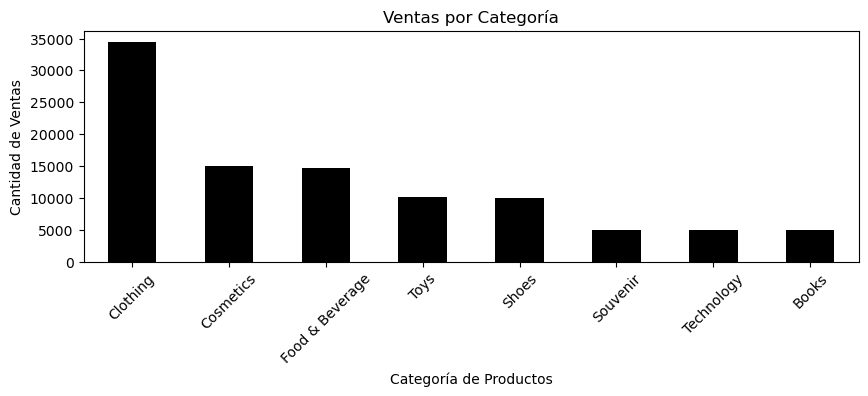

In [22]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 3))

# Contar las categorías y graficarlas
df["category"].value_counts().plot(kind="bar", color="black")

# Etiquetas y título
plt.xlabel("Categoría de Productos")
plt.ylabel("Cantidad de Ventas")
plt.title("Ventas por Categoría")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()


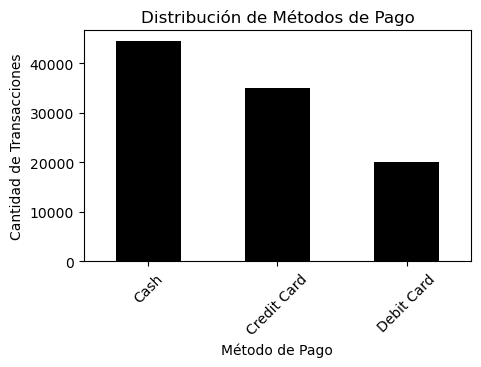

In [23]:
# Configurar tamaño de la figura
plt.figure(figsize=(5, 3))

# Graficar los métodos de pago
df["payment_method"].value_counts().plot(kind="bar", color="black")

# Etiquetas y título
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Transacciones")
plt.title("Distribución de Métodos de Pago")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar gráfico
plt.show()

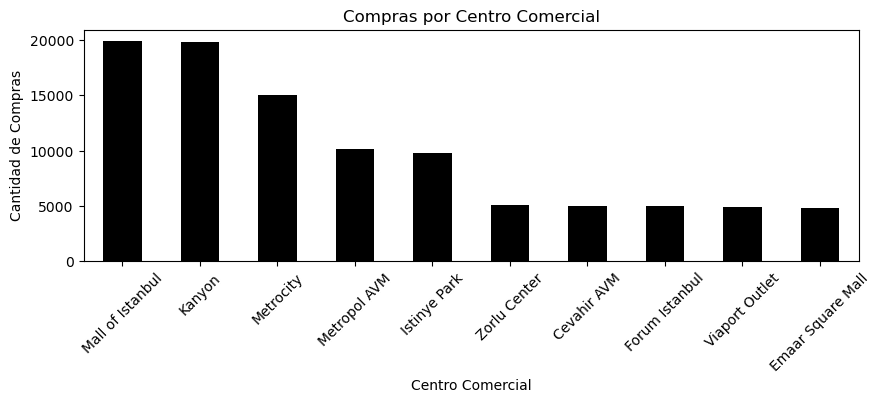

In [24]:
# Configurar otra figura para shopping_mall
plt.figure(figsize=(10, 3))

# Graficar los centros comerciales
df["shopping_mall"].value_counts().plot(kind="bar", color="black")

# Etiquetas y título
plt.xlabel("Centro Comercial")
plt.ylabel("Cantidad de Compras")
plt.title("Compras por Centro Comercial")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar gráfico
plt.show()

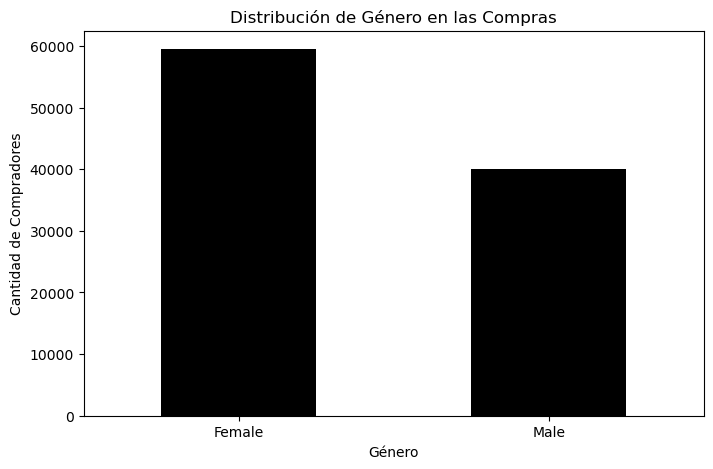

In [25]:
# Configurar tamaño de la figura
plt.figure(figsize=(8, 5))

# Graficar la distribución de género
df["gender"].value_counts().plot(kind="bar", color="black")

# Etiquetas y título
plt.xlabel("Género")
plt.ylabel("Cantidad de Compradores")
plt.title("Distribución de Género en las Compras")
plt.xticks(rotation=0)  # No es necesario rotar si son pocas categorías

# Mostrar gráfico
plt.show()

## 🔍 **Conclusiones rápidas:**
- La categoria mas vendida es **Clothing**.
- El metodo de paga preferido por los compradores es **Cash**, le sigue **Credit Card** y por ultimo esta **Debit Card**
- **Mall of Istanbul** y **Kanyon** son los centros comerciales donde las personas prefieren comprar.
- Las **Mujeres** son las que mas compran

---

## **Generando los scripts necesarios**
En este paso se realizara los scripts necesarios para exportar los datos en formato csv para poder poblar las tablas en la bodega de datos

In [28]:
# Crear y guardar la tabla dim_payment
dim_payment = df[["payment_method"]].drop_duplicates().reset_index(drop=True)
dim_payment["payment_method_id"] = dim_payment.index + 1

dim_payment_exp = dim_payment[['payment_method_id', 'payment_method']] 
dim_payment_exp.to_csv("./scripts/dim_payment.csv", index=False)

In [29]:
# Crear y guardar la tabla dim_category
dim_category = df[["category"]].drop_duplicates().reset_index(drop=True)
dim_category["category_id"] = dim_category.index + 1

dim_category_exp = dim_category[['category_id', 'category']]
dim_category_exp.to_csv("./scripts/dim_category.csv", index=False)

In [30]:
# Crear y guardar la tabla dim_mall
dim_mall = df[["shopping_mall"]].drop_duplicates().reset_index(drop=True)
dim_mall["shopping_mall_id"] = dim_mall.index + 1

dim_mall_exp = dim_mall[['shopping_mall_id', 'shopping_mall']]
dim_mall_exp.to_csv("./scripts/dim_mall.csv", index=False)

In [31]:
# Crear y guardar la tabla dim_customer
dim_customer = df[["customer_id", "gender", "age"]].drop_duplicates()
dim_customer.to_csv("./scripts/dim_customer.csv", index=False)

In [32]:
# Crear y guardar la tabla dim_date
df["invoice_date"] = pd.to_datetime(df["invoice_date"], format="%d/%m/%Y")
dim_date = df[["invoice_date"]].drop_duplicates()

dim_date["year"] = dim_date["invoice_date"].dt.year
dim_date["month"] = dim_date["invoice_date"].dt.month
dim_date["day"] = dim_date["invoice_date"].dt.day
dim_date["week_of_year"] = dim_date["invoice_date"].dt.isocalendar().week
dim_date["weekday"] = dim_date["invoice_date"].dt.day_name()
dim_date.to_csv("./scripts/dim_date.csv", index=False)

In [33]:
# Guardar la tabla fact_sales con IDs correctos
df = df.merge(dim_category, on="category", how="left")
df = df.merge(dim_payment, on="payment_method", how="left")
df = df.merge(dim_mall, on="shopping_mall", how="left")
df = df.merge(dim_date, on="invoice_date", how="left")

fact_sales = df[["invoice_no", "customer_id", "category_id", "payment_method_id", "shopping_mall_id", "invoice_date", "quantity", "price"]]
fact_sales.to_csv("./scripts/fact_sales.csv", index=False)